# FC Barcelona Match Outcome Prediction and Performance Suggestions

This notebook demonstrates the full workflow for predicting FC Barcelona match outcomes using historical performance data. It includes:

- **Data Loading and Preprocessing:** Both numeric and categorical features are handled.
- **Model Training and Evaluation:** Three models are trained and compared (Logistic Regression, Random Forest, and Gradient Boosting).
- **Feature Importance Analysis and Suggestions:** For non-linear models, top features are extracted and mapped to actionable suggestions for performance improvements.

This analysis is designed to help FC Barcelona’s Data Analytics Department (Barça Innovation Hub) to gain insights into which performance metrics are most critical and to offer strategies for improvement.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Ensure plots display in the notebook
%matplotlib inline

print('Libraries imported successfully.')

Libraries imported successfully.


## Step 1: Load the Dataset

Load the FC Barcelona match performance dataset from a CSV file. Make sure that the file `FC Barcelona Statistics.csv` is in the same directory as this notebook.

In [3]:
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully. Here are the first few rows:")
        display(df.head())
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Load the dataset (update the path if necessary)
dataset_path = 'FC Barcelona Statistics.csv'
df = load_dataset(dataset_path)

Dataset loaded successfully. Here are the first few rows:


,Date,Opponent,Home/Away,Competition,Goals Scored,Goals Conceded,Possession (%),Shots on Target,xG,Pass Accuracy (%),Tackles Won,Key Passes,Result,Injury Impact (%),Rest Days Before Match,Opponent Strength (ELO Rating),Weather Conditions,Managerial Change (Yes/No)
0,01-01-2020,Villarreal,Home,Copa del Rey,5,4,67,1,1.40,93,11,3,Win,23,9,1714,Windy,Yes
1,11-01-2020,Mallorca,Home,Copa del Rey,2,3,53,4,3.25,88,17,14,Loss,0,9,1681,Cold,Yes
2,21-01-2020,Real Madrid,Home,La Liga,0,4,56,10,2.94,83,6,3,Loss,17,10,1752,Sunny,Yes
3,25-01-2020,Mallorca,Away,La Liga,4,5,71,2,2.97,89,5,14,Loss,25,8,1514,Cold,Yes
4,28-01-2020,Valencia,Home,Champions League,1,0,66,1,2.96,88,20,13,Win,10,3,1852,Windy,Yes


## Step 2: Data Preprocessing

In this step, we:

- Separate the target variable (`Result`).
- Identify numeric and categorical features.
- Fill missing values (median for numeric, mode for categorical).
- Encode categorical features using one-hot encoding.
- Scale numeric features.

This ensures that both numeric and non-numeric data (which can be useful for actionable insights) are incorporated.

In [4]:
def preprocess_data(df):
    if 'Result' not in df.columns:
        print("Error: 'Result' column not found in the dataset.")
        return None, None, None, None
        
    y = df['Result']
    X = df.drop(columns=['Result'])
    
    # Identify numeric and categorical columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Fill missing values
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
    for col in categorical_cols:
        X[col] = X[col].fillna(X[col].mode()[0])
    
    # One-hot encoding for categorical features
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    
    feature_names = X_encoded.columns.tolist()
    
    # Encode target labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print("Target classes:", label_encoder.classes_)
    
    # Scale numeric features only (using original numeric column names)
    scaler = StandardScaler()
    X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])
    
    return X_encoded.values, y_encoded, feature_names, label_encoder

# Preprocess the data
X, y, feature_names, label_encoder = preprocess_data(df)
print("Data preprocessing completed.")

Target classes: ['Draw' 'Loss' 'Win']
Data preprocessing completed.


## Step 3: Model Training and Evaluation

We split the data into training and testing sets (80/20 split) and train the following models:

- **Logistic Regression** (baseline linear model)
- **Random Forest Classifier** (non-linear ensemble model)
- **Gradient Boosting Classifier** (non-linear ensemble model)

For each model, we calculate the accuracy, weighted F1-score, and display the confusion matrix. We also perform 5-fold cross-validation for additional robustness.


Training Logistic Regression...
Logistic Regression Accuracy: 0.9250
Logistic Regression Weighted F1-Score: 0.9042
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        Draw       1.00      0.25      0.40         4
        Loss       0.89      1.00      0.94        17
         Win       0.95      1.00      0.97        19

    accuracy                           0.93        40
   macro avg       0.95      0.75      0.77        40
weighted avg       0.93      0.93      0.90        40



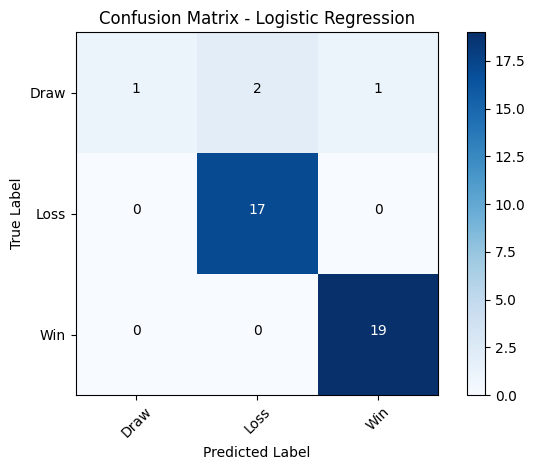

Logistic Regression Cross-validation Accuracy: 0.8625 ± 0.0250

Training Random Forest...
Random Forest Accuracy: 0.8750
Random Forest Weighted F1-Score: 0.8298
Random Forest Classification Report:
               precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         4
        Loss       0.94      0.94      0.94        17
         Win       0.83      1.00      0.90        19

    accuracy                           0.88        40
   macro avg       0.59      0.65      0.62        40
weighted avg       0.79      0.88      0.83        40



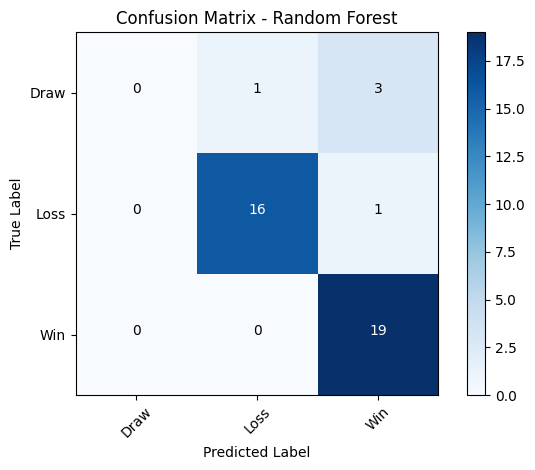

Random Forest Cross-validation Accuracy: 0.7750 ± 0.0306

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9000
Gradient Boosting Weighted F1-Score: 0.8548
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         4
        Loss       1.00      1.00      1.00        17
         Win       0.83      1.00      0.90        19

    accuracy                           0.90        40
   macro avg       0.61      0.67      0.63        40
weighted avg       0.82      0.90      0.85        40



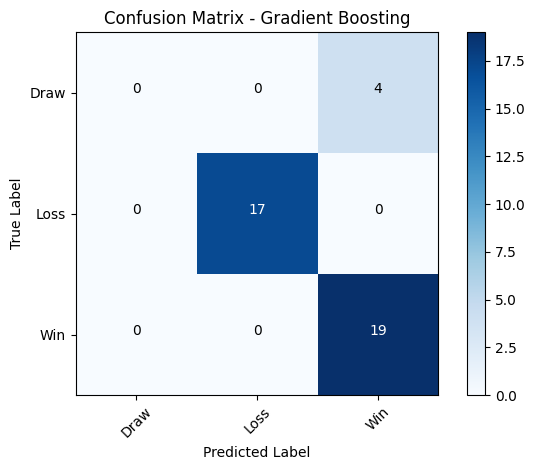

Gradient Boosting Cross-validation Accuracy: 0.9000 ± 0.0500


In [ ]:
def plot_confusion_matrix(cm, model_name, classes):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test, label_encoder, feature_names):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Weighted F1-Score: {f1:.4f}")
        print(f"{name} Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))
        
        results[name] = {
            'accuracy': acc,
            'f1_score': f1,
            'confusion_matrix': cm
        }
        
        # Plot confusion matrix
        plot_confusion_matrix(cm, name, list(label_encoder.classes_))
        
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"{name} Cross-validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
        
        if hasattr(model, 'feature_importances_'):
            results[name]['feature_importances'] = dict(zip(feature_names, model.feature_importances_))
    
    return results

# Split data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and evaluate
results = train_and_evaluate(X_train, X_test, y_train, y_test, label_encoder, feature_names)

## Step 4: Extract Feature Importances and Provide Suggestions

For the non-linear models (Random Forest and Gradient Boosting), we extract feature importances. Based on the top features, we provide actionable suggestions for improving team performance. The suggestions are mapped based on keywords in the feature names.

In [8]:
def provide_suggestions(feature_importances, top_n=3):
    suggestion_mapping = {
        'Possession (%)': "Focus on strategies that improve ball retention and control the pace of the game.",
        'Shots on Target': "Improve shot quality and conversion rate to capitalize on offensive opportunities.",
        'xG': "Increase the quality of goal-scoring opportunities.",
        'Pass Accuracy (%)': "Enhance passing accuracy to maintain possession and create better attacking plays.",
        'Tackles Won': "Strengthen defensive efforts to win back possession.",
        'Key Passes': "Increase the number of key passes to create more goal-scoring opportunities.",
        'Goals Scored': "Focus on offensive strategies to increase the number of goals scored.",
        'Goals Conceded': "Improve defensive organization to minimize opponent scoring opportunities.",
        'Injury Impact (%)': "Manage player fitness and recovery to reduce the impact of injuries.",
        'Rest Days Before Match': "Optimize training and recovery schedules to ensure players are well-rested.",
        'Opponent Strength (ELO Rating)': "Develop strategies to counter strong opponents."
    }
    
    sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    suggestions = []
    
    print("\nTop features and suggestions for performance improvement:")
    for feature, importance in sorted_features[:top_n]:
        suggestion = suggestion_mapping.get(feature, "Investigate this factor further to determine how it can be optimized for better performance.")
        suggestions.append((feature, importance, suggestion))
        print(f"- {feature}: importance = {importance:.4f}")
        print(f"  Suggestion: {suggestion}")
    
    return suggestions

# Provide suggestions for non-linear models if available
for model_name in ['Random Forest', 'Gradient Boosting']:
    if 'feature_importances' in results[model_name]:
        print(f"\nAnalyzing feature importances for {model_name}:")
        suggestions = provide_suggestions(results[model_name]['feature_importances'], top_n=3)


Analyzing feature importances for Random Forest:

Top features and suggestions for performance improvement:
- Goals Conceded: importance = 0.1683
  Suggestion: Improve defensive organization to minimize opponent scoring opportunities.
- Goals Scored: importance = 0.1444
  Suggestion: Focus on offensive strategies to increase the number of goals scored.
- xG: importance = 0.0506
  Suggestion: Increase the quality of goal-scoring opportunities.

Analyzing feature importances for Gradient Boosting:

Top features and suggestions for performance improvement:
- Goals Conceded: importance = 0.4599
  Suggestion: Improve defensive organization to minimize opponent scoring opportunities.
- Goals Scored: importance = 0.3686
  Suggestion: Focus on offensive strategies to increase the number of goals scored.
- xG: importance = 0.0210
  Suggestion: Increase the quality of goal-scoring opportunities.


## Step 5: Model Comparison Summary

We now summarize the evaluation metrics for each model, including accuracy and weighted F1-scores.

In [9]:
print("\nFinal model comparison results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, Weighted F1-score = {metrics['f1_score']:.4f}")


Final model comparison results:
Logistic Regression: Accuracy = 0.9250, Weighted F1-score = 0.9042
Random Forest: Accuracy = 0.8750, Weighted F1-score = 0.8298
Gradient Boosting: Accuracy = 0.9000, Weighted F1-score = 0.8548


## Conclusion

This notebook demonstrated a complete workflow for predicting FC Barcelona match outcomes and providing actionable insights. We processed both numeric and categorical data, compared three different models, and extracted feature importances from the non-linear models to offer tactical suggestions.

Feel free to adjust the code, mapping of features to suggestions, or any parameters to further refine the analysis.